Puzzle
----

https://thefiddler.substack.com/p/happy-100th-fiddler

**Fiddler**

How many distinct equilateral triangles can you find in a Triangular Grid with of 28 nodes (7 per side)?

**Extra Credit**

How many distinct parallelograms can you find whose vertices are all centers of stars (in the flag of the USA)?

Thinking
----
I was wondering if using trilinear coordinates would make things easier, but the distance formula in trilinear coordinates seems to make things harder, not easier.

https://en.wikipedia.org/wiki/Trilinear_coordinates#Distance_between_two_points

Also, originally, I was planning to count up the triangles by hand, but that seems tricky once one starts to consider triangles that are not aligned / anti-aligned with the overall grid. Anyway, I counted 97 triangles in my head, so let's see how close or not that is to the final answer.

And for testing parallelogram-ness, it would be best to use equal-slopes-for-opposite-sides rather than equal-lengths-of-opposite-side, because one can get a crossing quadrilateral with equal lengths that is not a  parallelogram - basically a hourglass type of shape - |X|.

https://en.wikipedia.org/wiki/Antiparallelogram

Fiddler Solution
---



N=7: Found 126 equilateral triangles.
Side length 1.00 has 36 triangles.


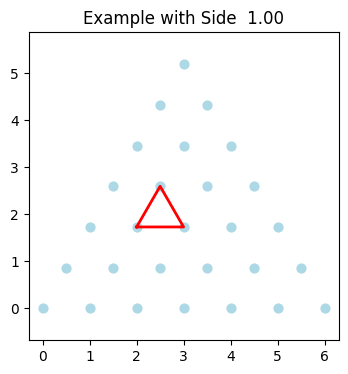

Side length 1.73 has 20 triangles.


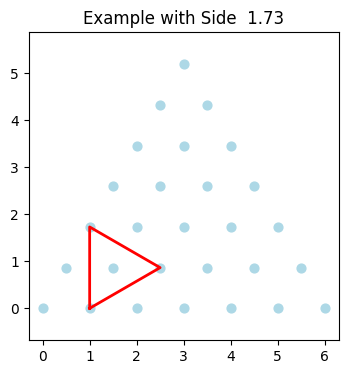

Side length 2.00 has 21 triangles.


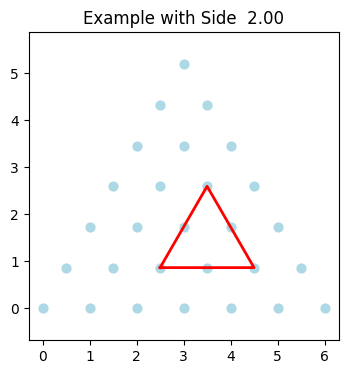

Side length 2.65 has 18 triangles.


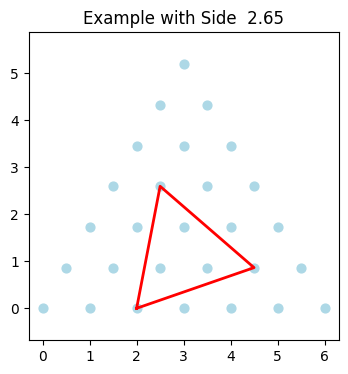

Side length 3.00 has 11 triangles.


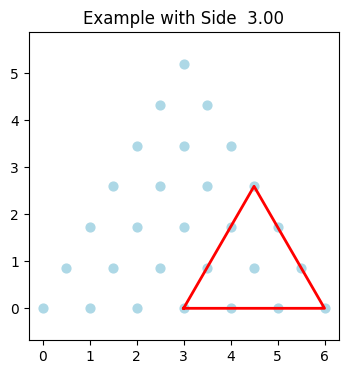

Side length 3.46 has 2 triangles.


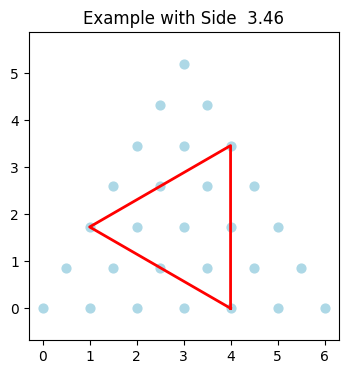

Side length 3.61 has 6 triangles.


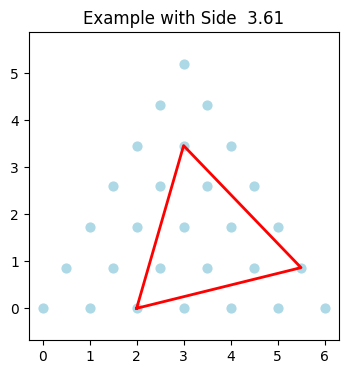

Side length 4.00 has 6 triangles.


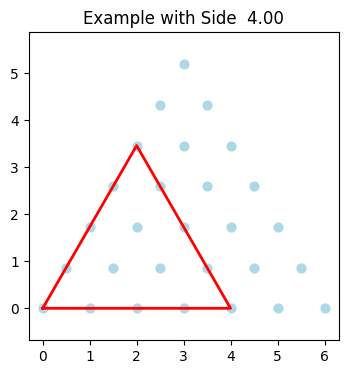

Side length 4.58 has 2 triangles.


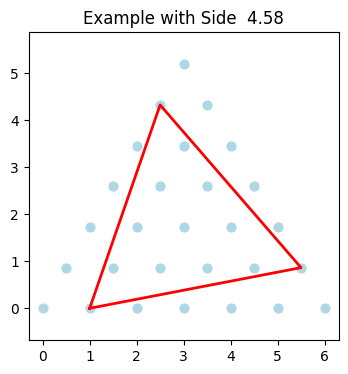

Side length 5.00 has 3 triangles.


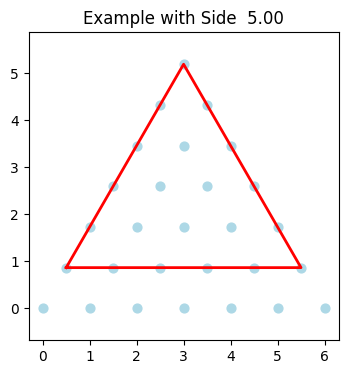

Side length 6.00 has 1 triangles.


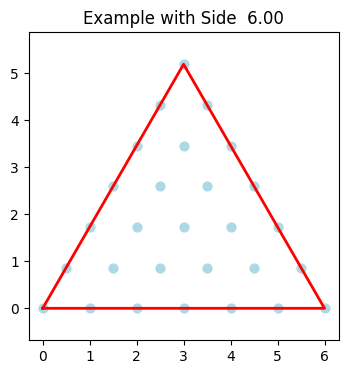

In [31]:
def create_triangular_grid(n):
    """
    Create a triangular grid of size n x n.
    
    Args:
    n (int): The size of the grid.
    
    Returns:
    list: A list of (x, y) coordinates representing the triangular grid.
    """
    grid = []
    sqrt_3 = 3 ** 0.5
    for v in range(n): # vertical
        for h in range(n-v): # horizontal
            x = (2 * h + v)/2
            y = (v * sqrt_3)/2
            grid.append( (x, y) )
    return grid

def sq_distance_2pt(p1, p2):
    return (p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2
            
def distance_2pt(p1, p2):
    return sq_distance_2pt(p1, p2) ** 0.5
    
from math import isclose
from statistics import mean 
def valid_equilateral_triangle(a, b, c):
    """
    Check if three points form a valid equilateral triangle.
    
    Args:
    a, b, c (tuple): Points represented as (x, y) coordinates.
    
    Returns:
    tuple: A tuple containing the side length and the points if they form an equilateral triangle,
           otherwise None.
    """
    sd_ab = sq_distance_2pt(a, b)
    sd_bc = sq_distance_2pt(b, c)
    sd_ca = sq_distance_2pt(c, a)
    
    is_eq = isclose(sd_ab, sd_bc) and isclose(sd_bc, sd_ca)
    if not is_eq:
        return None
    else:
        side_length = mean([sd_ab, sd_bc, sd_ca]) ** 0.5
        return (side_length, a, b, c)

def find_equilateral_triangles(grid):
    """
    Find all equilateral triangles in a triangular grid.
    
    Args:
    grid (list): A list of (x, y) coordinates representing the triangular grid.
    
    Returns:
    list: A list of tuples containing the side length and the points of each equilateral triangle found.
    """
    triangles = []
    n = len(grid)
    
    for i in range(n):
        for j in range(i + 1, n):
            for k in range(j + 1, n):
                triangle = valid_equilateral_triangle(grid[i], grid[j], grid[k])
                if triangle:
                    triangles.append(triangle)
    
    return triangles

# This code is for displaying the triangular grid and an equilateral triangles found within it.
import matplotlib.pyplot as plt
def display_grid_and_triangle(grid, a=None, b=None, c=None, title="Triangular Grid", bg_lines=False):
    """
    Display the triangular grid using matplotlib.
    
    Args:
    grid (list): A list of (x, y) coordinates representing the triangular grid.
    """
    x_coords = [point[0] for point in grid]
    y_coords = [point[1] for point in grid]
    
    plt.figure(figsize=(4, 4))
    plt.scatter(x_coords, y_coords, s=40, color='lightblue')
    
    # Draw lines between points to visualize the grid
    if bg_lines:
        for i in range(len(grid)):
            for j in range(i + 1, len(grid)):
                if isclose(sq_distance_2pt(grid[i], grid[j]), 1.0):  # Assuming unit distance for adjacent points
                    plt.plot([grid[i][0], grid[j][0]], [grid[i][1], grid[j][1]], color='gray', alpha=0.5)
        
    # Draw the equilateral triangle
    if a and b and c:
        triangle_x = [a[0], b[0], c[0], a[0]]
        triangle_y = [a[1], b[1], c[1], a[1]]
        plt.plot(triangle_x, triangle_y, color='red', linewidth=2)

    plt.title(title)
    plt.axis('equal')
    plt.grid(False)
    plt.show()


# Create an animation of the triangular grid and display equilateral triangles found within it.
# This code finds all equilateral triangles in a triangular grid of size 7 and displays them.
import matplotlib.animation as animation
def animate_grid_with_triangles(grid, triangles, bg_lines=False):
    """
    Animate the triangular grid and display equilateral triangles found within it.
    
    Args:
    grid (list): A list of (x, y) coordinates representing the triangular grid.
    triangles (list): A list of tuples containing the side length and the points of each equilateral triangle found.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    def update(frame):
        ax.clear()
        x_coords = [point[0] for point in grid]
        y_coords = [point[1] for point in grid]
        if frame == 0:
            ax.scatter(x_coords, y_coords, s=40, color='blue')
        else:
            ax.scatter(x_coords, y_coords, s=40, color='lightblue')
        
        # Draw lines between points to visualize the grid
        if bg_lines:
            for i in range(len(grid)):
                for j in range(i + 1, len(grid)):
                    if isclose(sq_distance_2pt(grid[i], grid[j]), 1.0):
                        ax.plot([grid[i][0], grid[j][0]], [grid[i][1], grid[j][1]], color='gray', alpha=0.5)

        if frame == 0:
            ax.set_title("How many Equilateral Triangles does this Grid have?")
        else:
            trinum = min(frame, len(triangles)) - 1 
            side_length, a, b, c = triangles[trinum]
            triangle_x = [a[0], b[0], c[0], a[0]]
            triangle_y = [a[1], b[1], c[1], a[1]]
            ax.plot(triangle_x, triangle_y, color='red', linewidth=2)
            ax.set_title(f"N={trinum+1} Side Length {side_length:.2f}" if side_length > 0 else "Triangular Grid")
        ax.axis('equal')
        ax.grid(False)
    
    ani = animation.FuncAnimation(fig, update, frames=(len(triangles)+1), repeat=True)
    #plt.show()
    ani.save('triangular_grid_animation.mp4', writer='ffmpeg', fps=2)

import random
def solve_fiddler(n=7, details=True, images=True, animate=True):
    """
    Solve the Fiddler's problem by finding all equilateral triangles in a triangular grid of size 7.
    
    Returns:
    list: A list of tuples containing the side length and the points of each equilateral triangle found.
    """
    grid = create_triangular_grid(n)
    triangles = find_equilateral_triangles(grid)

    # Sort triangles by side length, and then by y and x coordinates
    triangles.sort(key=lambda x: ( round(x[0],7), round(min(x[1][1], x[2][1], x[3][1]),7), round(min(x[1][0], x[2][0], x[3][0]),7) ))  
    
    print(f"N={n}: Found {len(triangles)} equilateral triangles.")
    #for triangle in triangles:
    #    print(f"Triangle with side length {triangle[0]:.2f} at points {triangle[1]}, {triangle[2]}, {triangle[3]}")
    
    triangles_by_side = {}
    for t in triangles:
        side_length = round(t[0], 7)
        if side_length not in triangles_by_side:
            triangles_by_side[side_length] = []
        triangles_by_side[side_length].append((t[1], t[2], t[3]))
    
    for side_length in sorted(triangles_by_side.keys()):
        triangles_by_side[side_length].sort()
        if details:
            print(f"Side length {side_length:.2f} has {len(triangles_by_side[side_length])} triangles.")
        if images:
            example_triangle = random.choice(triangles_by_side[side_length])            
            display_grid_and_triangle(grid, example_triangle[0], example_triangle[1], example_triangle[2],
                                    title=f"Example with Side  {side_length:.2f}")

    if animate:    
        animate_grid_with_triangles(grid, triangles)
    
    return None

solve_fiddler(animate=False)

The animation is on youtube: https://youtu.be/kgxFYHgey9Q

I am also curious to see how this number evolves.

In [32]:
for i in range(2, 15):
    solve_fiddler(n=i, images=False, animate=False, details=False)

N=2: Found 1 equilateral triangles.
N=3: Found 5 equilateral triangles.
N=4: Found 15 equilateral triangles.
N=5: Found 35 equilateral triangles.
N=6: Found 70 equilateral triangles.
N=7: Found 126 equilateral triangles.
N=8: Found 210 equilateral triangles.
N=9: Found 330 equilateral triangles.
N=10: Found 495 equilateral triangles.
N=11: Found 715 equilateral triangles.
N=12: Found 1001 equilateral triangles.
N=13: Found 1365 equilateral triangles.
N=14: Found 1820 equilateral triangles.


Looking this up on OEIS, this is https://oeis.org/A000332 , and there is a formula for it too. Great!

Translating slightly, a triangle with $n$ points per side has ${n+2}\choose{4}$ equilateral triangles. Here ${7+2}\choose{4}$ $= 126$

There's a proof based on induction, but I wonder if there is some visualization that makes this obvious.



----

Solution for Extra Credit
----

I am going to try to not get distracted too much by plots and animations here. :)

N=5: Found 5918 parallelograms.
Area 0.42 has 659 parallelograms.


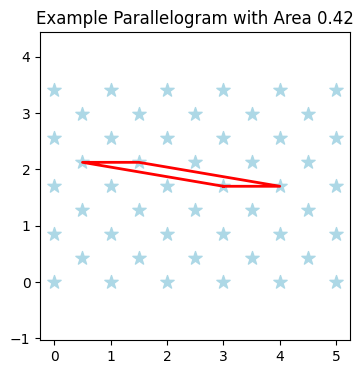

Area 0.85 has 876 parallelograms.


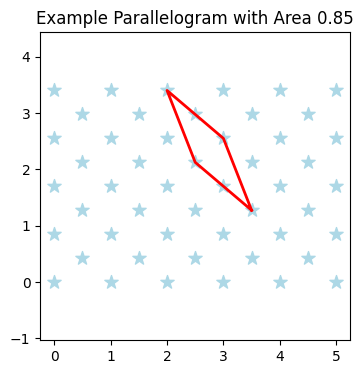

Area 1.27 has 644 parallelograms.


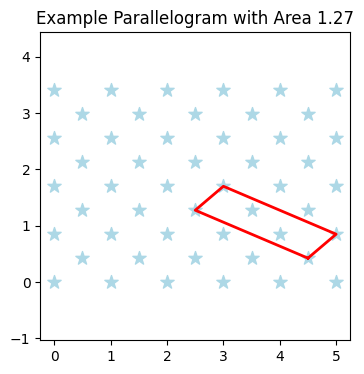

Area 1.70 has 742 parallelograms.


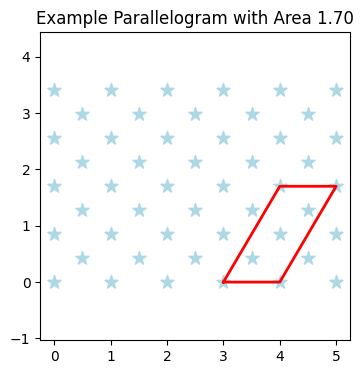

Area 2.12 has 391 parallelograms.


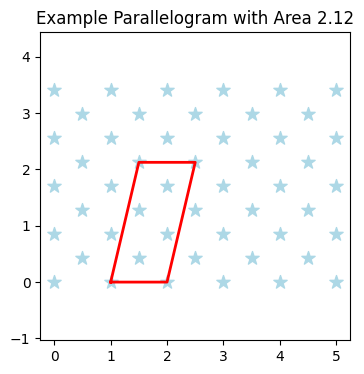

Area 2.55 has 600 parallelograms.


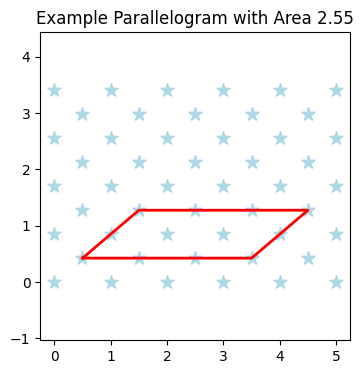

Area 2.97 has 258 parallelograms.


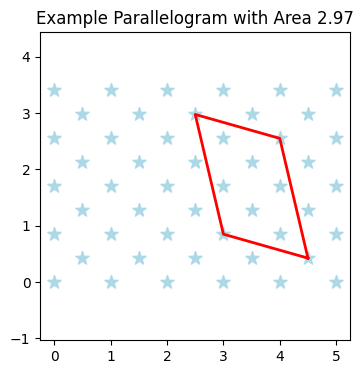

Area 3.40 has 398 parallelograms.


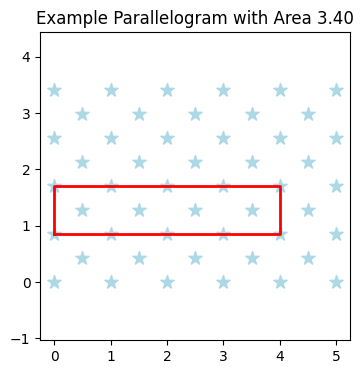

Area 3.82 has 217 parallelograms.


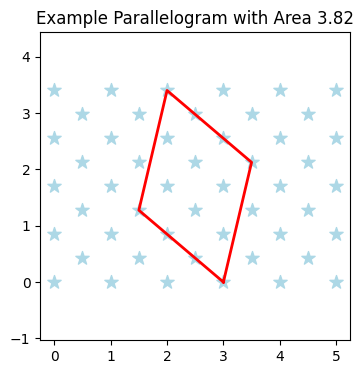

Area 4.25 has 252 parallelograms.


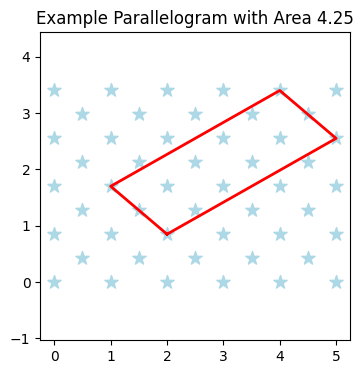

Area 4.67 has 104 parallelograms.


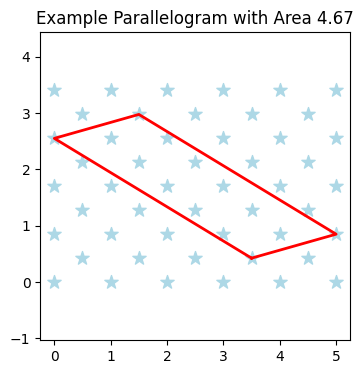

Area 5.10 has 228 parallelograms.


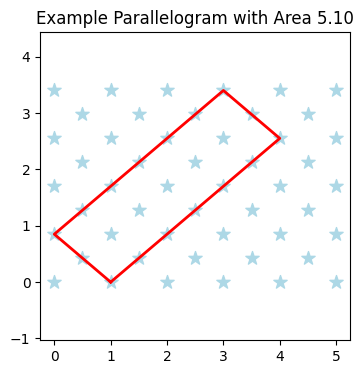

Area 5.52 has 62 parallelograms.


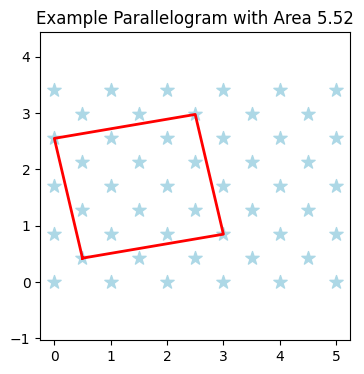

Area 5.95 has 112 parallelograms.


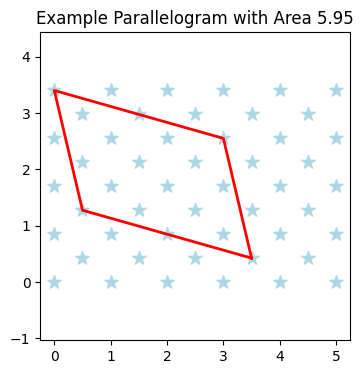

Area 6.37 has 63 parallelograms.


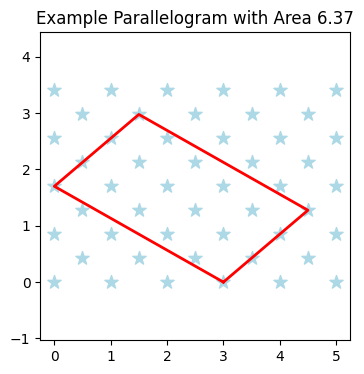

Area 6.80 has 94 parallelograms.


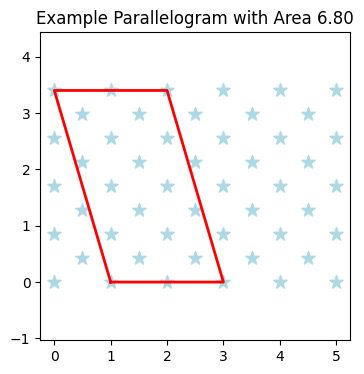

Area 7.22 has 26 parallelograms.


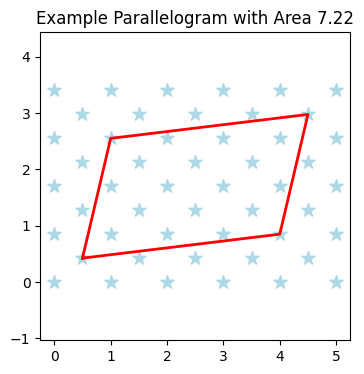

Area 7.65 has 62 parallelograms.


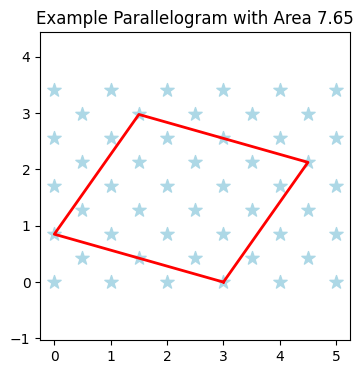

Area 8.07 has 10 parallelograms.


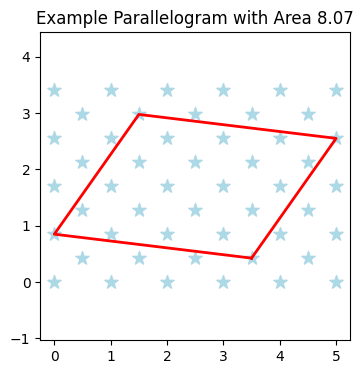

Area 8.50 has 29 parallelograms.


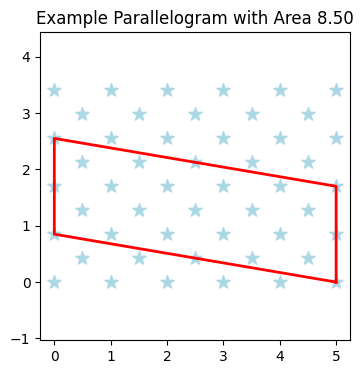

Area 8.92 has 26 parallelograms.


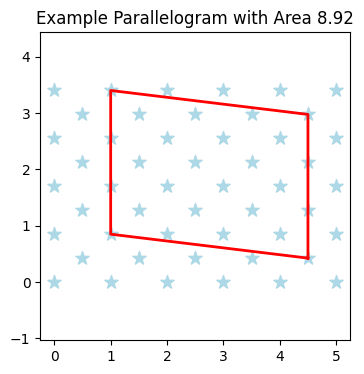

Area 9.35 has 12 parallelograms.


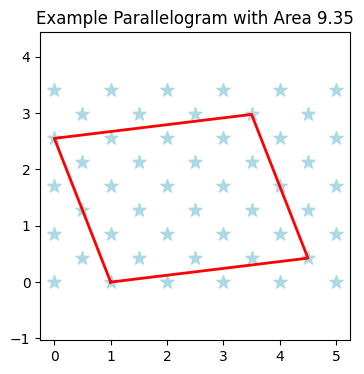

Area 9.77 has 4 parallelograms.


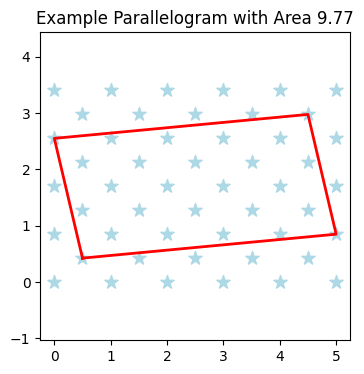

Area 10.20 has 26 parallelograms.


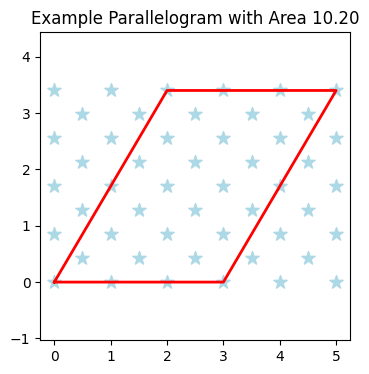

Area 10.62 has 2 parallelograms.


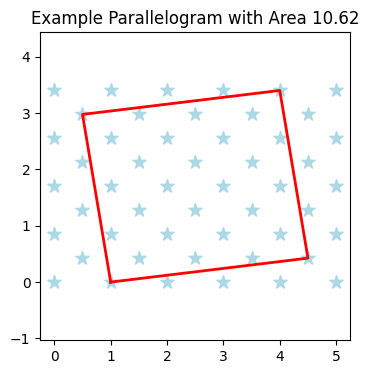

Area 11.05 has 2 parallelograms.


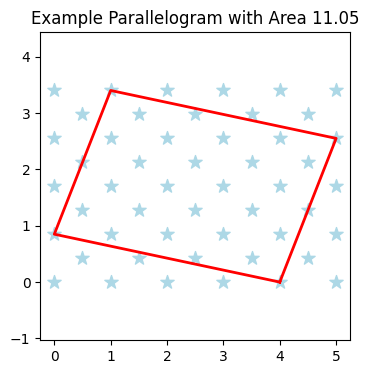

Area 11.47 has 4 parallelograms.


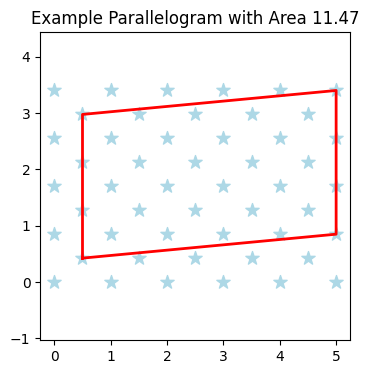

Area 11.90 has 4 parallelograms.


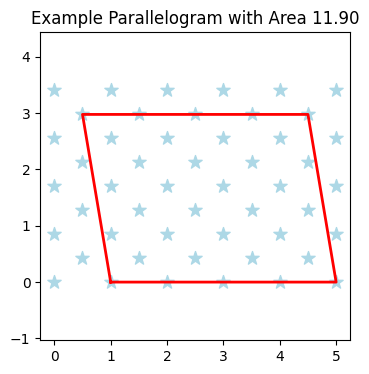

Area 12.75 has 4 parallelograms.


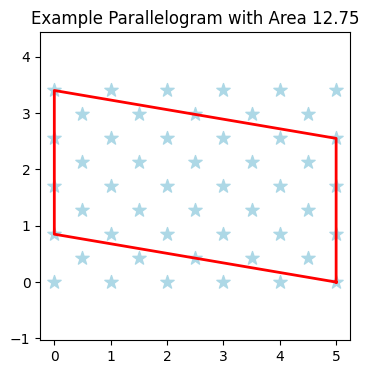

Area 13.17 has 2 parallelograms.


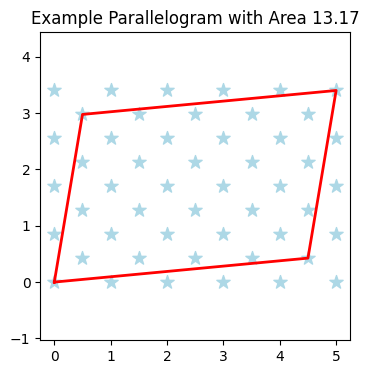

Area 13.60 has 4 parallelograms.


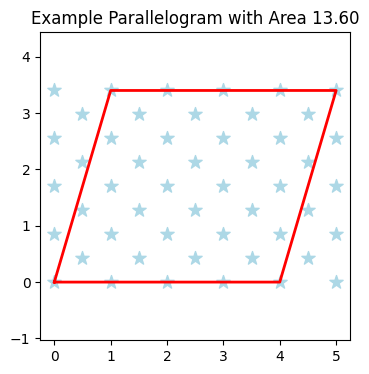

Area 17.00 has 1 parallelograms.


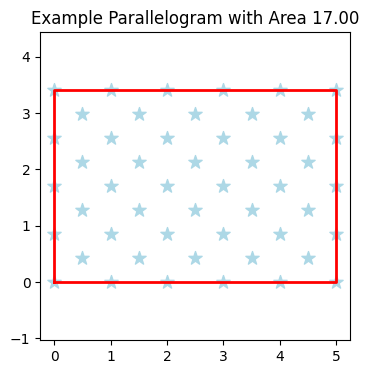

In [33]:
def generate_flag_grid(n=5):
    """
    Generate a grid in the pattern of the USA flag.
    
    Args:
    n (int): The size of the grid.
    
    Returns:
    list: A list of (x, y) coordinates representing the grid.
    """
    grid = []
    f_by_2h = 0.0538/(2*0.0633) # https://en.wikipedia.org/wiki/Flag_of_the_United_States#Specifications
    for v in range(2*n-1): # vertical
        for h in range(v%2,2*n+1,2): # horizontal
            x = h/2
            y = v*f_by_2h
            grid.append((x, y))
    return grid

assert(len(generate_flag_grid(n=5)) == 50)

def slope(a,b):
    """
    Calculate the slope of the line connecting two points.
    
    Args:
    a, b (tuple): Points represented as (x, y) coordinates.
    
    Returns:
    float: The slope of the line connecting the points.
    """
    if a[0] == b[0]:  # vertical line
        #return float('inf')
        return 10000 # Inf, but not too large to avoid issues in calculations or comparisons.
    return (b[1] - a[1]) / (b[0] - a[0])

def area_parallelogram(a, b, c, d):
    """
    Calculate the area of a parallelogram defined by four points.
    
    Args:
    a, b, c, d (tuple): Points represented as (x, y) coordinates.
    
    Returns:
    float: The area of the parallelogram.
    """
    return round(abs((b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])),7)

def valid_parallelogram(a, b, c, d):
    """
    Check if four points form a valid parallelogram.
    
    Args:
    a, b, c, d (tuple): Points represented as (x, y) coordinates.
    
    Returns:
    tuple: A tuple containing the points in a specific order if they form a valid parallelogram,
           otherwise None.
    """
    slope_ab = slope(a, b)
    slope_ac = slope(a, c)
    slope_ad = slope(a, d)
    slope_bc = slope(b, c)
    slope_bd = slope(b, d)
    slope_cd = slope(c, d)
        
    p,q,r,s = None, None, None, None
    if (isclose(slope_ab, slope_cd) and isclose(slope_bc, slope_ad)):
        # a is between b and d.
        p,q,r,s = a,b,c,d        
    elif (isclose(slope_ab, slope_cd) and isclose(slope_ac, slope_bd)):
        # a is between b and c.
        p,q,r,s = a,b,d,c        
    elif (isclose(slope_ac, slope_bd) and isclose(slope_ad, slope_bc)):
        # a is between c and d.
        p,q,r,s = a,c,b,d
    if (p is not None and q is not None and r is not None and s is not None):
        area = area_parallelogram(p, q, r, s)
        if area > 0:
            return (area, p, q, r, s)        
    return None

def find_parallelograms(grid):
    """
    Find all parallelograms in a grid.
    
    Args:
    grid (list): A list of (x, y) coordinates representing the grid.
    
    Returns:
    list: A list of tuples containing the points of each parallelogram found.
    """
    parallelograms = []
    n = len(grid)
    
    for i in range(n):
        for j in range(i + 1, n):
            for k in range(j + 1, n):
                for l in range(k + 1, n):
                    parallelogram = valid_parallelogram(grid[i], grid[j], grid[k], grid[l])
                    if parallelogram:
                        parallelograms.append(parallelogram)
    
    return parallelograms

def display_parallelogram(grid, a=None, b=None, c=None, d=None, title="Parallelogram Grid", bg_lines=False):
    """
    Display the grid and a parallelogram using matplotlib.
    
    Args:
    grid (list): A list of (x, y) coordinates representing the grid.
    """
    x_coords = [point[0] for point in grid]
    y_coords = [point[1] for point in grid]
    
    plt.figure(figsize=(4, 4))
    plt.scatter(x_coords, y_coords, s=100, color='lightblue', marker='*')
    
    # Draw lines between points to visualize the grid
    if bg_lines:
        for i in range(len(grid)):
            for j in range(i + 1, len(grid)):
                if isclose(sq_distance_2pt(grid[i], grid[j]), 1.0):  # Assuming unit distance for adjacent points
                    plt.plot([grid[i][0], grid[j][0]], [grid[i][1], grid[j][1]], color='gray', alpha=0.5)
        
    # Draw the parallelogram
    if a and b and c and d:
        parallelogram_x = [a[0], b[0], c[0], d[0], a[0]]
        parallelogram_y = [a[1], b[1], c[1], d[1], a[1]]
        plt.plot(parallelogram_x, parallelogram_y, color='red', linewidth=2)

    plt.title(title)
    plt.axis('equal')
    plt.grid(False)
    plt.show()

import matplotlib.animation as animation
def animate_grid_with_parallelograms(grid, parallelograms, bg_lines=False):
    """
    Animate the Flag grid and display parallelograms found within it.
    
    Args:
    grid (list): A list of (x, y) coordinates representing the grid.
    parallelograms (list): A list of tuples containing the aea and the points of each  parallelogram found.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    def update(frame):
        ax.clear()
        x_coords = [point[0] for point in grid]
        y_coords = [point[1] for point in grid]
        if frame == 0:
            ax.scatter(x_coords, y_coords, s=40, color='blue')
        else:
            ax.scatter(x_coords, y_coords, s=40, color='lightblue')
        
        # Draw lines between points to visualize the grid
        if bg_lines:
            for i in range(len(grid)):
                for j in range(i + 1, len(grid)):
                    if isclose(sq_distance_2pt(grid[i], grid[j]), 1.0):
                        ax.plot([grid[i][0], grid[j][0]], [grid[i][1], grid[j][1]], color='gray', alpha=0.5)

        if frame == 0:
            ax.set_title("How many Parallelograms does this Grid have?")
        else:
            pnum = min(frame, len(parallelograms)) - 1 
            area, a, b, c, d = parallelograms[pnum]
            parallelogram_x = [a[0], b[0], c[0], d[0], a[0]]
            parallelogram_y = [a[1], b[1], c[1], d[1], a[1]]
            ax.plot(parallelogram_x, parallelogram_y, color='red', linewidth=2)
            ax.set_title(f"N={pnum+1} Area {area:.2f}" if area > 0 else "Flag Grid")
        ax.axis('equal')
        ax.grid(False)
    
    ani = animation.FuncAnimation(fig, update, frames=(len(parallelograms)+1), repeat=True)
    #plt.show()
    ani.save('flag_grid_animation.mp4', writer='ffmpeg', fps=30)


def solve_fiddler_parallelogram(n=5, details=True, images=True, animate=True):
    """
    Solve the Fiddler's problem by finding all parallelograms in a grid of size n.
    
    Args:
    n (int): The size of the grid.
    
    Returns:
    list: A list of tuples containing the points of each parallelogram found.
    """
    grid = generate_flag_grid(n)
    parallelograms = find_parallelograms(grid)

    # Sort parallelograms by their points
    parallelograms.sort(key=lambda x: (x[0], round(min(x[1][1], x[2][1], x[3][1], x[4][1]),7),  round(min(x[1][0], x[2][0], x[3][0], x[4][0]),7)) )

    print(f"N={n}: Found {len(parallelograms)} parallelograms.")
    
    parallelograms_by_area = {}
    for p in parallelograms:
        area = p[0]
        if area not in parallelograms_by_area:
            parallelograms_by_area[area] = []
        parallelograms_by_area[area].append((p[1], p[2], p[3], p[4]))

    if details:
        for area in sorted(parallelograms_by_area.keys()):
            parallelograms_by_area[area].sort()
            print(f"Area {area:.2f} has {len(parallelograms_by_area[area])} parallelograms.")
            if images:
                example_parallelogram = random.choice(parallelograms_by_area[area])
                display_parallelogram(grid, example_parallelogram[0], example_parallelogram[1],
                              example_parallelogram[2], example_parallelogram[3],
                              title=f"Example Parallelogram with Area {area:.2f}", bg_lines=False)
    
    if animate:
        animate_grid_with_parallelograms(grid, parallelograms)

    return None

solve_fiddler_parallelogram(n=5, details=True, images=True, animate=False)

And the animation is at :

https://youtu.be/sQz2aHirGKQ